In [1]:
%pip install -U networkx

Requirement already up-to-date: networkx in d:\wpy64-3770\python-3.7.7.amd64\lib\site-packages (2.4)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [1]:
import networkx as nx

In [2]:
#grafo no dirigido
G_fb = nx.read_edgelist('data/facebook_combined.csv', create_using=nx.Graph(), nodetype=int)

#grafo dirigido
# G_fb = nx.read_edgelist('data/facebook_combined.csv', create_using=nx.DiGraph(), nodetype=int)
 


In [3]:
#average degree - Grado medio: el número medio de conexiones (de entrada/salida o ambos) de cada nodo de la red.
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [4]:
#densidad del grafo: el ratio entre las conexiones presentes en el grafo y todas las conexiones posibles.
nx.density(G_fb)

0.010819963503439287

In [33]:
#Diámetro: la ruta más larga entre todas las rutas más cortas de conexión posible entre los nodos dos a dos (máxima distancia entre puntos extremos de la red)
#Transitividad: mide las interconexiones en una red, (responde a la pregunta si A conoce a B y A conoce a C, ¿B y C se conocen?)
diameter = nx.diameter(G_fb)
triadic_closure = nx.transitivity(G_fb)

In [35]:
print(diameter)
print(triadic_closure)

8
0.5191742775433075


In [5]:
# No dirigido
#nx.Graph()
# Grafo dirigido
#nx.DiGraph()
# Grafo no dirigido con múltiples conexiones entre dos nodos
#nx.MultiGraph()
# Grafo dirigido con múltiples conexiones entre dos nodos
#nx.MultiDiGraph()

In [6]:
#Centralidad de intermediación - en cada nodo contamos el número de rutas óptimas (i.e. la ruta más corta entre dos nodos cualesquiera) que pasan por él
#Compute the shortest-path betweenness centrality for nodes.
bt = nx.betweenness_centrality(G_fb)

In [7]:
bt_list = [(id, b) for id, b in bt.items()]
bt_list_ord = sorted(bt_list, key=lambda b: b[1], reverse=True)

In [37]:
#nodos con mas centralidad de intermediación
for node_id, centrality in bt_list_ord[:10]:
    print(node_id, centrality)

107 0.4805180785560152
1684 0.3377974497301992
3437 0.23611535735892905
1912 0.2292953395868782
1085 0.14901509211665306
0 0.14630592147442917
698 0.11533045020560802
567 0.09631033121856215
58 0.08436020590796486
428 0.06430906239323866


In [38]:
bt_list_ord

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215),
 (58, 0.08436020590796486),
 (428, 0.06430906239323866),
 (563, 0.06278022847240787),
 (860, 0.05782590687091168),
 (414, 0.04763337297172344),
 (1577, 0.03978470502937034),
 (348, 0.03799809748091909),
 (1718, 0.03734287067796221),
 (686, 0.029721898375122513),
 (594, 0.02880319816351658),
 (136, 0.026870359787398053),
 (3980, 0.02482003363624553),
 (1465, 0.024571838924158013),
 (171, 0.015492407332440639),
 (862, 0.0117477777650519),
 (483, 0.010308265926953497),
 (2543, 0.007604626657378419),
 (3830, 0.00643694140005414),
 (376, 0.006195646424799318),
 (1666, 0.006174767405889478),
 (1420, 0.006056580020060359),
 (1534, 0.005948477022332591),
 (713, 0.005014135370940547),
 (475, 0.004998494829229422),
 (1405, 0.004097162971815614),
 (828, 0.00396316061746

In [13]:
# Centralidad de Kantz
# ka = nx.kantz_centrality(G_fb)
ka = nx.katz_centrality_numpy(G_fb)
# nx.eigenvector_centrality(G_fb)
# nx.pagerank(G_fb)
ka

{0: 0.043520260145860246,
 1: 0.003199599566990411,
 2: -0.0028855128057167826,
 3: -0.005344275261854582,
 4: 0.006268862924928888,
 5: 0.002779825451725471,
 6: 0.00220906089645485,
 7: 0.016807836659249772,
 8: 0.002599547244747003,
 9: -0.002860180136719212,
 10: 0.0003347774897980019,
 11: 0.001038415580573591,
 12: 0.0010384155805735938,
 13: 0.00011158283539716941,
 14: -0.004486269471884194,
 15: 0.0010384155805735912,
 16: 0.00492545201384349,
 17: -0.0027540366707751248,
 18: 0.001038415580573592,
 19: 0.0024984414120463364,
 20: -0.004141895702619596,
 21: -0.01004768724693631,
 22: 0.010357708138379105,
 23: 0.007207057311489634,
 24: -0.0041312332168828595,
 25: 0.0031453124207514865,
 26: -0.0042391049502710915,
 27: 0.004129671484937618,
 28: -0.0036484079636737473,
 29: 0.0051802719891978245,
 30: 0.003481497342235282,
 31: 0.00713094043807411,
 32: 0.0008903291109370222,
 33: 0.0011537950895262083,
 34: 0.012568235769141047,
 35: 0.002214269327204762,
 36: -0.002622430

In [14]:
#The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close,
#while treating nodes as repelling objects, sometimes called an anti-gravity force.
#Simulation continues until the positions are close to an equilibrium.

spring_pos = nx.spring_layout(G_fb)

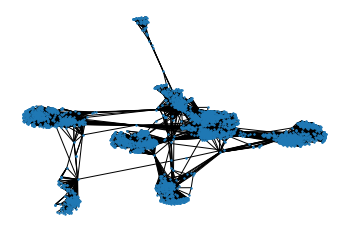

In [15]:
import matplotlib.pyplot as plt
plt.axis('off')
nx.draw_networkx(G_fb, pos=spring_pos, with_labels=False, node_size=2)

In [16]:
#detección de comunidades
%pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [17]:
import community

In [23]:
parts = community.best_partition(G_fb)
parts

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 2,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [24]:
parts.items()

dict_items([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 1), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 2), (108, 0), (109, 0)

In [25]:
#conjunto de comunidades 
#Un conjunto es una colección no ordenada de objetos únicos. Python provee este tipo de datos «por defecto» al igual que otras colecciones más convencionales como las listas, tuplas y diccionarios.
communities = set(parts.values())
communities

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [26]:
members = {c:[] for c in communities}
for id, c in parts.items():
    members[c].append(id)

#diccionario con los miembros de las comunidades
members

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,


In [27]:
for c, m in members.items():
    print(f'Comunidad {c}: {len(m)} elementos')

Comunidad 0: 350 elementos
Comunidad 1: 429 elementos
Comunidad 2: 446 elementos
Comunidad 3: 423 elementos
Comunidad 4: 535 elementos
Comunidad 5: 326 elementos
Comunidad 6: 117 elementos
Comunidad 7: 548 elementos
Comunidad 8: 73 elementos
Comunidad 9: 237 elementos
Comunidad 10: 25 elementos
Comunidad 11: 60 elementos
Comunidad 12: 206 elementos
Comunidad 13: 226 elementos
Comunidad 14: 19 elementos
Comunidad 15: 19 elementos


In [28]:
G_fb.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [29]:
colores = [parts[n] for n in G_fb.nodes()]
colores

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


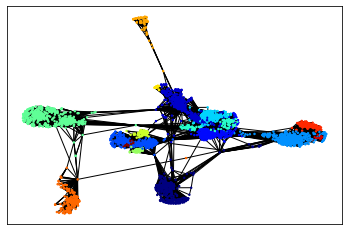

In [30]:
nx.draw_networkx(G_fb, pos=spring_pos, cmap=plt.get_cmap('jet'), node_color=colores, node_size=2, with_labels=False)

In [53]:
#También podemos superponer varias visualizaciones, por ejemplo para identificar a los nodos con mayor centralidad:
#bt_list_ord - pinto los nodos con más centralidad

top = 10 # dibuja los 10 nodos con mayor centralidad
bt_values = [0]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())

for max_id, max_bt in bt_list_ord[:top]:
    bt_values[max_id] = 500*max_bt

In [54]:
 bt_list_ord[:top]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215),
 (58, 0.08436020590796486),
 (428, 0.06430906239323866)]

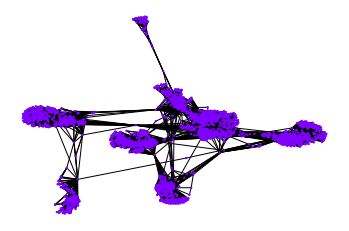

In [56]:
plt.axis("off")
# Primero dibujamos todos los puntos con un diámetro pequeño
h = nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"),node_color = [0]*len(G_fb.nodes()), node_size = [2]*len(G_fb.nodes()), with_labels = False)

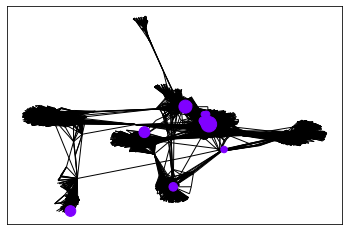

In [57]:
# Dibujamos todos los puntos otra vez, pero ahora
# la mayoría tienen diámetro 0 y los 10 con mayor
# centralidad tienen diámetro proporcional a su valor
h = nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"),node_color = bt_colors, node_size = bt_values, with_labels = False)

In [31]:
#Ejemplo generamos el grafo de Tutte
G = nx.tutte_graph()

In [32]:
G